In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

Dictionary for our Y classes

In [2]:
dictt = {"Iris-setosa" : 1 , "Iris-versicolor" : 2 , "Iris-virginica" : 3}

Read File

In [3]:
data = pd.read_csv("iris.data", sep = ',', header = None)
data.columns = ["sepal length" , "sepal width" , "petal length" , "petal width", "Type"]
X = data.iloc[:,0:4]
y = data.iloc[:,4]

We replace y labels with numbers (1,2,3) also we add X0 column to our X data (1)

In [4]:
y = data.iloc[:,4]
for i in range(len(y)):
    y[i] = dictt[y[i]]
X = np.array(X)
y = np.array(y, dtype = "int32")
X = np.insert(X,0,1,axis = 1)

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Now we reduce the dimensions for plotting the data in 2-Dimensions. (for better understanding)

In [5]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)

Function for plotting the data

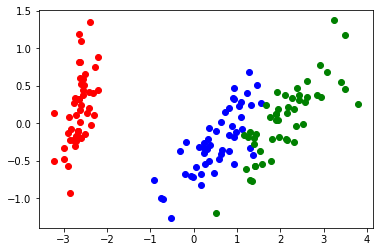

In [9]:
def plot(X):
    plt.plot(X[0:50,0] , X[0:50,1], 'ro')
    plt.plot(X[50:100,0] , X[50:100,1] , 'bo')
    plt.plot(X[100:150,0] , X[100:150,1], 'go')
    
plot(pca_x)

Divide dataset to train and test sets to test the accuracy of our model. (60% 40%)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

we train our data using One-vs-All SVM and also use the model to predict the test set.

In [13]:
clf = OneVsRestClassifier(svm.SVC(kernel="poly", degree=3)).fit(x_train, y_train)
y_predict = clf.predict(x_test)

Now we compute the accuracy of our model on the test set. 

In [14]:
error = 0
m = y_test.shape[0]
for i in range(len(y_predict)):
    if y_predict[i] != y_test[i]:
        error += 1
print(((m-error)/m) * 100 , "%", "accuracy")

98.33333333333333 % accuracy
